# Hyperparameter Hunting with RBM and MLP

In [1]:
import matplotlib.pyplot as plt
plt.ion()

In [2]:
from Mnist import *
from Supervised import *
from Unsupervised import *
import numpy as np

np.set_printoptions( precision = 3, suppress = True )

Hyperparameters taken from [Reducing the Dimensionality of Data with Neural Networks by Geoffrey Hinton and R. R. Salakhutdinov](http://www.cs.toronto.edu/%7Ehinton/science.pdf)

In [3]:
# General settings (you CAN change these):
mnist_use_threshold = True

# RBM hyperparameters (you CAN change these):
rbm_is_continuous	= False
rbm_visible_size	= 784
rbm_hidden_size		= 500
rbm_batch_size		= 10
rbm_learn_rate		= 0.01
rbm_cd_steps		= 1
rbm_training_epochs = 100
rbm_report_freq		= 1
rbm_report_buffer	= rbm_training_epochs

# MLP hyperparameters (you CAN change these):
mlp_layer_sizes		= [ rbm_hidden_size, 500, 2000, 10 ] 
mlp_batch_size		= 10 
mlp_learn_rate		= 0.01
mlp_training_epochs = 200
mlp_report_freq		= 1
mlp_report_buffer	= mlp_training_epochs

# MNIST training example counts (you CANNOT change these):
mnist_num_training_examples	  = 10000
mnist_num_validation_examples =	 5000
mnist_num_testing_examples	  =	 5000

In [4]:
# Load MNIST dataset:
mnist = Mnist( mnist_use_threshold )

training_digits,   training_labels	 = mnist.getTrainingData( mnist_num_training_examples )
validation_digits, validation_labels = mnist.getValidationData( mnist_num_validation_examples )
testing_digits,	   testing_labels	 = mnist.getTestingData( mnist_num_testing_examples )

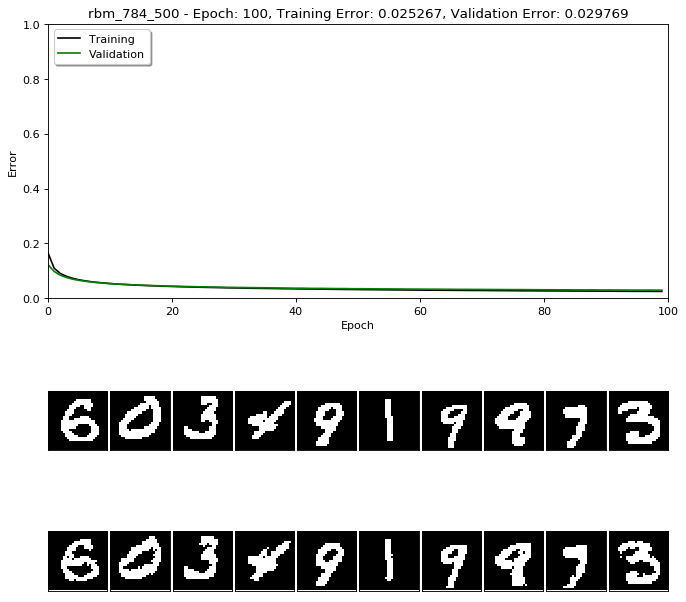

In [5]:
# Initialize and train RBM:
rbm_name = 'rbm_' + str(rbm_visible_size) + '_' + str(rbm_hidden_size)
rbm = Rbm( rbm_name, rbm_visible_size, rbm_hidden_size, rbm_is_continuous )
rbm.train( training_digits, validation_digits, rbm_learn_rate, rbm_cd_steps, rbm_training_epochs, rbm_batch_size, rbm_report_freq, rbm_report_buffer )

In [6]:
# Encode datasets with RBM:
_, training_encodings = rbm.getHiddenSample( training_digits )
_, validation_encodings = rbm.getHiddenSample( validation_digits )
_, testing_encodings = rbm.getHiddenSample( testing_digits )

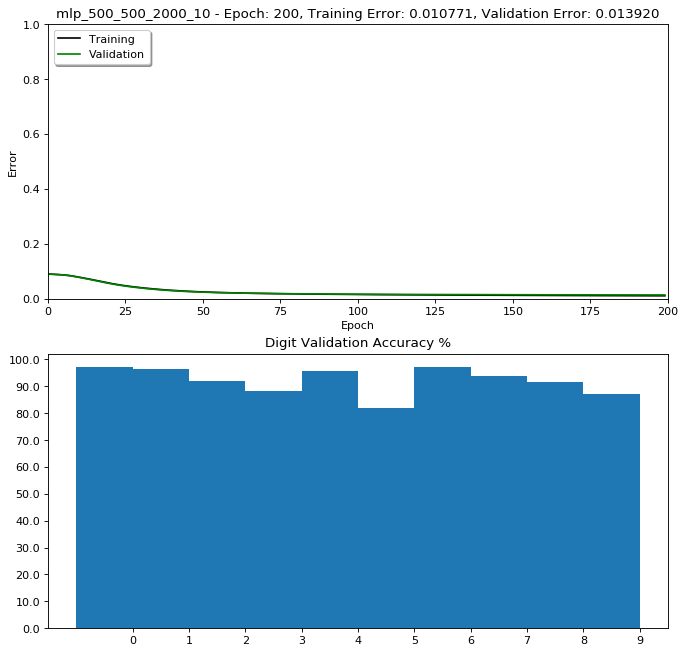

In [7]:
# Initialize and train MLP:
mlp_name = 'mlp_' + '_'.join( str(i) for i in mlp_layer_sizes )
mlp = Mlp( mlp_name, mlp_layer_sizes, 'sigmoid' )
mlp.train( training_encodings, training_labels, validation_encodings, validation_labels, mlp_learn_rate, mlp_training_epochs, mlp_batch_size, mlp_report_freq, mlp_report_buffer )

In [8]:
# Perform final test:
testing_guesses = mlp.predict( testing_encodings )
testing_error = mlp.getErrorRate( testing_labels, testing_guesses )
testing_accuracy = mnist_get_accuracy( testing_labels, testing_guesses )
#     return testing_error, testing_accuracy
print ('Final Testing Error Rate: %f' % ( testing_error ))
print ('Final Testing Accuracy: %f' % ( testing_accuracy ))

Final Testing Error Rate: 0.013575
Final Testing Accuracy: 0.928200
